In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
data1 = pd.read_csv('population.csv', header=None)
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
1,"Population, total",SP.POP.TOTL,Japan,JPN,126843000,127149000,127445000,127718000,127761000,127773000,127854000,128001000,128063000,128047000,128070000,127833000,127629000,127445000,127276000,127141000
2,"Population, total",SP.POP.TOTL,"Korea, Rep.",KOR,47008111,47370164,47644736,47892330,48082519,48184561,48438292,48683638,49054708,49307835,49554112,49936638,50199853,50428893,50746659,51014947
3,"Population, total",SP.POP.TOTL,Singapore,SGP,4027887,4138012,4175950,4114826,4166664,4265762,4401365,4588599,4839396,4987573,5076732,5183688,5312437,5399162,5469724,5535002
4,Population growth (annual %),SP.POP.GROW,Japan,JPN,0.167275578113187,0.240952587521069,0.232527187105684,0.213980948779682,0.0336622582725446,0.00939209655766336,0.0633735894181335,0.114908847726211,0.0484253945978966,-0.0124946312294096,0.0179605415195644,-0.185226486410846,-0.159710675844347,-0.144271883387076,-0.132694222147042,-0.106124993746747


In [4]:
data1.columns = ['Series Name','Series Code','Country Name','Country Code','2000','2001','2002','2003','2004',
                '2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

In [5]:
#取得人口數
population1 = data1.iloc[1:4]
population1

,Series Name,Series Code,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,"Population, total",SP.POP.TOTL,Japan,JPN,126843000,127149000,127445000,127718000,127761000,127773000,127854000,128001000,128063000,128047000,128070000,127833000,127629000,127445000,127276000,127141000
2,"Population, total",SP.POP.TOTL,"Korea, Rep.",KOR,47008111,47370164,47644736,47892330,48082519,48184561,48438292,48683638,49054708,49307835,49554112,49936638,50199853,50428893,50746659,51014947
3,"Population, total",SP.POP.TOTL,Singapore,SGP,4027887,4138012,4175950,4114826,4166664,4265762,4401365,4588599,4839396,4987573,5076732,5183688,5312437,5399162,5469724,5535002


In [6]:
#人口數與都市發展有著密切關係，也會影響平均國民所得及分配資源

Country = ['JAPAN', 'KOREA', 'SINGAPORE']
years = np.linspace(2000, 2015, 16)
#日本
Pd_country1 = population1.loc[1]
#韓國
Pd_country2 = population1.loc[2]
#新加坡
Pd_country3 = population1.loc[3]

alldata = {
    "JAPAN": Pd_country1,
    "KOREA" : Pd_country2,
    "SINGAPORE": Pd_country3,
}

df = pd.DataFrame(alldata)
df = df.iloc[4:]
df

,JAPAN,KOREA,SINGAPORE
2000,126843000,47008111,4027887
2001,127149000,47370164,4138012
2002,127445000,47644736,4175950
2003,127718000,47892330,4114826
2004,127761000,48082519,4166664
2005,127773000,48184561,4265762
2006,127854000,48438292,4401365
2007,128001000,48683638,4588599
2008,128063000,49054708,4839396
2009,128047000,49307835,4987573


TypeError: 'NoneType' object is not iterable

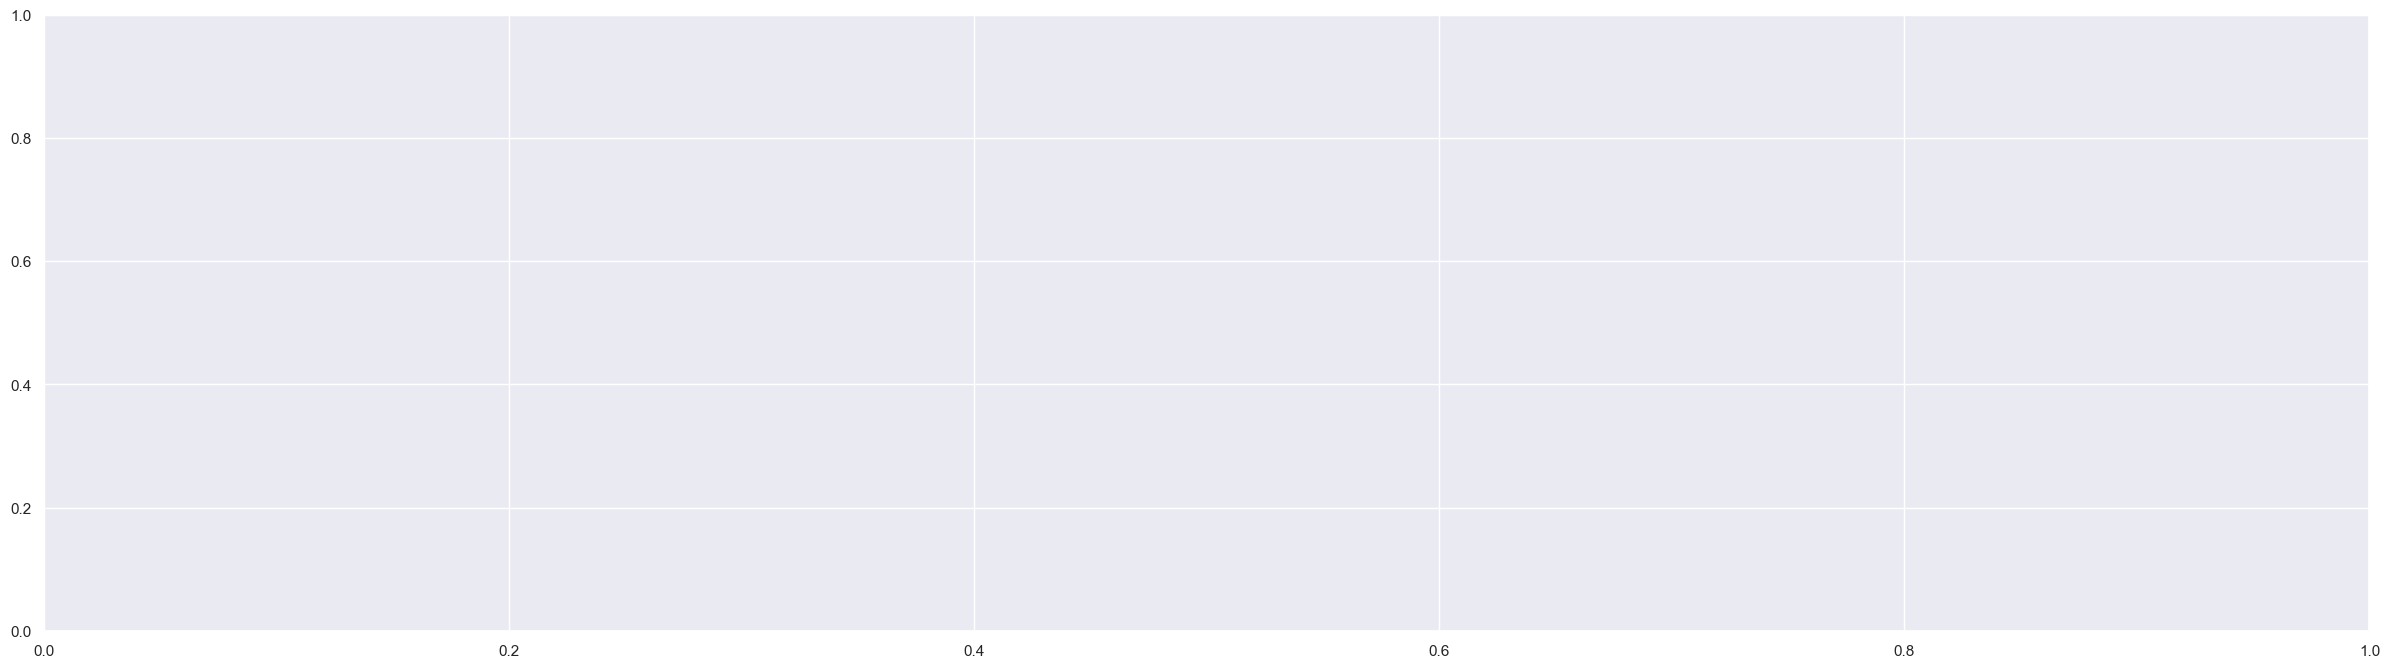

In [76]:
sns.set(rc={'figure.figsize': (30, 8)})

# 清理數據，移除 NaN 或 Inf
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# 繪製面積圖
g = sns.lineplot(data=df_cleaned, linewidth=2)

g.fill_between(df_cleaned.index, df_cleaned['JAPAN'], alpha=0.2, color='green', label='JAPAN')
g.fill_between(df_cleaned.index, df_cleaned['KOREA'], alpha=0.2, color='blue', label='KOREA')
g.fill_between(df_cleaned.index, df_cleaned['SINGAPORE'], alpha=0.2, color='orange', label='SINGAPORE')

# 添加標題
plt.title('Population Total(JAP v.s. KOR v.s. SGP )', fontsize=20)

# 添加 x 軸和 y 軸標籤
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population Number', fontsize=16)

# 添加圖例
plt.legend()

# 顯示圖形
plt.show()

In [10]:
data2 = pd.read_csv('relate.csv', header=None)
data2.head()

,0,1,2,3,4,5,6,7,8,9
0,Country Name,Country Code,Series Name,Series Code,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
1,Japan,JPN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,57.3887430327135,59.0152801637455,60.7133638032773,62.3833231883095,63.9521257887958,65.290106306176
2,Japan,JPN,Consumer price index (2010 = 100),FP.CPI.TOTL,99.7323663990331,99.680566347233,100.0259000259,102.788569455236,103.600103600104,103.47923681257
3,Japan,JPN,"Total employment, total (ages 15+)",SL.EMP.TOTL,62969428,62794462,63334058,63813725,64152974,64752352
4,"Korea, Rep.",KOR,Age dependency ratio (% of working-age populat...,SP.POP.DPND,36.481759149123,36.3589055204387,36.3228990728866,36.4410282679253,36.7429178205437,37.1496082598761


In [11]:
data2.columns = ['Series Name','Series Code','Country Name','Country Code','2011','2012','2013','2014','2015','2016']

In [12]:
Age_dependency_ratio = data2.iloc[[1, 4, 7]]
#扶養比
Age_dependency_ratio

,Series Name,Series Code,Country Name,Country Code,2011,2012,2013,2014,2015,2016
1,Japan,JPN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,57.3887430327135,59.0152801637455,60.7133638032773,62.3833231883095,63.9521257887958,65.290106306176
4,"Korea, Rep.",KOR,Age dependency ratio (% of working-age populat...,SP.POP.DPND,36.481759149123,36.3589055204387,36.3228990728866,36.4410282679253,36.7429178205437,37.1496082598761
7,Singapore,SGP,Age dependency ratio (% of working-age populat...,SP.POP.DPND,35.8092770864642,36.0043849622012,36.3473387177015,36.7979217671482,37.3419885620364,37.9844314563033


In [13]:
#消費指數
Consumer_price_index =data2.iloc[[2, 5, 8]]
Consumer_price_index

,Series Name,Series Code,Country Name,Country Code,2011,2012,2013,2014,2015,2016
2,Japan,JPN,Consumer price index (2010 = 100),FP.CPI.TOTL,99.7323663990331,99.680566347233,100.0259000259,102.788569455236,103.600103600104,103.47923681257
5,"Korea, Rep.",KOR,Consumer price index (2010 = 100),FP.CPI.TOTL,104.025846249594,106.301121621065,107.684500029745,109.057170183459,109.827340829112,110.894505383873
8,Singapore,SGP,Consumer price index (2010 = 100),FP.CPI.TOTL,105.247910208201,110.064012324365,112.659983380321,113.814728526275,113.21975920438,112.617106126894


In [14]:
#總勞動人口
Total_employment =data2.iloc[[3, 6, 9]]
Total_employment

,Series Name,Series Code,Country Name,Country Code,2011,2012,2013,2014,2015,2016
3,Japan,JPN,"Total employment, total (ages 15+)",SL.EMP.TOTL,62969428,62794462,63334058,63813725,64152974,64752352
6,"Korea, Rep.",KOR,"Total employment, total (ages 15+)",SL.EMP.TOTL,24785678,25215504,25558106,26151652,26437243,26690966
9,Singapore,SGP,"Total employment, total (ages 15+)",SL.EMP.TOTL,2801195,2908712,2969817,3052031,3167910,3204829


ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

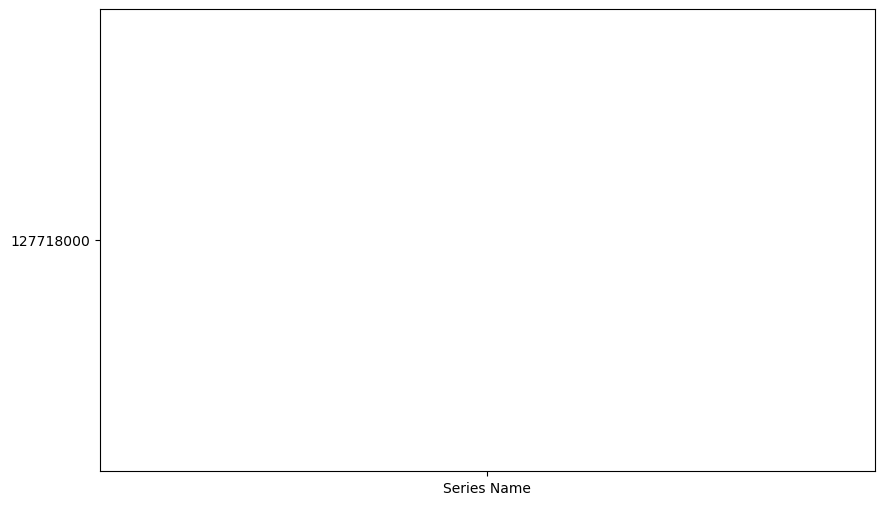

In [16]:
selected_rows = [3, 6, 9]

# 创建一个图形
plt.figure(figsize=(10, 6))

x = df.columns

# 创建一个数据框来存储所有选定行的数据
selected_data = df.iloc[selected_rows]
# 遍历选定的行，每一行绘制一条折线
for row_index in selected_rows:
    row_data = df.iloc[row_index]  # 获取行数据
    x = Total_employment.columns  # 列标题作为 x 轴
    y = row_data.values  # 行数据作为 y 轴
    plt.plot(x, y, label=f'Row {row_index + 1}')

# 添加 x 轴和 y 轴标签
plt.xlabel('Series Code', fontsize=14)
plt.ylabel('2011', fontsize=14)
# 添加图例
plt.legend()

# 显示图形
plt.show()

In [99]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y='')],
    layout_title_text="人數"
)
fig

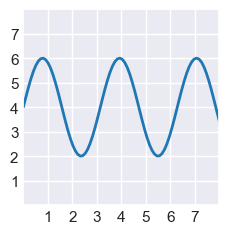

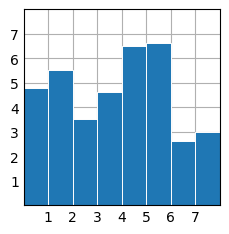

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
#